In [1]:
#Load data
import pandas as pd

file_path = '/kaggle/input/aera02-aptitudeassessment-dataset-nlp/AERA02_AptitudeAssessment_Dataset_NLP.csv'
df = pd.read_csv(file_path)
df.head()

,score,title,review
0,5.0,Very good hotel,"Good hotel i have ever stayed in Vietnam, good..."
1,4.0,BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...,Este hotel está muy cerca del barrio de las em...
2,5.0,Great place in Cau Giay,This place was very nice. Our bedroom were cle...
3,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...
4,5.0,Perfect stay,It was a amazing hotel. They helped very good ...


**DATA PREPROCESSING**

In [ ]:
!pip install langdetect
!pip install swifter
from langdetect import detect
import swifter # Parallel computing for faster execution

def detect_vietnamese_review(text):
  try:
    return detect(text)
  except:
    return None

# Filter "title" and "review" containing Vietnamese
df['title_vietnamese'] = df['title'].swifter.apply(detect_vietnamese_review)
df['review_vietnamese'] = df['review'].swifter.apply(detect_vietnamese_review)

vietnamese_reviews = df[(df['title_vietnamese'] == 'vi') | (df['review_vietnamese'] == 'vi')]

print(vietnamese_reviews)
vietnamese_reviews.to_csv('/kaggle/working//vietnamese_reviews.csv', index=False)

In [7]:
import pandas as pd

file_path_vietnamese_reviews = '/kaggle/input/vietnamese-reviews/vietnamese_reviews.csv'
vietnamese_reviews_preprocessing = pd.read_csv(file_path_vietnamese_reviews)

# combining 'title' and 'review' column to get more context
vietnamese_reviews_preprocessing['context'] = vietnamese_reviews_preprocessing['title'] + ". " + vietnamese_reviews_preprocessing['review']

# dropping useless features/columns
vietnamese_reviews_preprocessing.drop(labels=['title', 'review', 'title_vietnamese', 'review_vietnamese'], axis=1, inplace=True)

vietnamese_reviews_preprocessing = vietnamese_reviews_preprocessing.drop_duplicates(subset=['context']) # Drop duplicate contexts

vietnamese_reviews_preprocessing = vietnamese_reviews_preprocessing.dropna() # Drop rows with missing values

mask = ~vietnamese_reviews_preprocessing["score"].isin(["1.0", "2.0", "3.0", "4.0", "5.0"]) # Filter out rows with invalid scores
vietnamese_reviews_preprocessing = vietnamese_reviews_preprocessing[~mask]

print(vietnamese_reviews_preprocessing)

      score                                            context
0       5.0  TRẢI NGHIỆM TỐT. Đầy đủ dịch vụ tiện nghi Ăn s...
1       5.0  Tuyệt vời. Khách sạn mới, sạch sẽ, có bar và b...
2       5.0  trải nghiệm tuyệt vời tại Brandi Gate. Khách s...
3       5.0  Good hotel, good room rates. During the last v...
4       1.0  Tồi , lừa đảo. Mình đặt 2 phòng ở 3 đêm từ 30/...
...     ...                                                ...
80924   5.0  Lần thứ 2 quay lại. Vừa rồi tham gia cuộc thi ...
80925   4.0  Giá rẻ nhân viên thân thiện. Gia đình chúng tô...
80926   5.0  Giá rẻ, đồ ăn ngon. Thấy khách sạn lâu rồi mà ...
80927   5.0  Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng. Khách s...
80928   5.0  Công tác. Rất tuyệt vời... khi đến đây tôi cảm...

[51474 rows x 2 columns]


In [9]:
import re
import unicodedata


def remove_special_characters(text):
    text = re.sub(r'[^\w\s]', ' ', text) # Replace special characters that are not letters, numbers, or spaces with a space
    text = unicodedata.normalize('NFC', text)
    return text

def lowercase_text(text):
    return text.lower()

# Remove non-Vietnamese text from data
def remove_non_vietnamese_words(text):
    pattern = r'[a-z0-9A-Z_ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêếýìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂưăạảấầẩẫậắằẳẵặẹẻẽềềểỄỆỈỊỌỎỐỒỔỖỘỚỜỞỠỢỤỦỨỪễệỉịọỏốồổỗộớờởỡợụủứừỬỮỰỲỴÝỶỸửữựỳỵỷỹ]+'
    vietnamese_words = re.findall(pattern, text)
    cleaned_text = ' '.join(vietnamese_words)
    return cleaned_text

def replace_spaces(text):
    text = re.sub(r"\s+", r" ", text).strip()
    return text
vietnamese_reviews_preprocessing['context'] = vietnamese_reviews_preprocessing['context'].apply(remove_special_characters)
vietnamese_reviews_preprocessing['context'] = vietnamese_reviews_preprocessing['context'].apply(lowercase_text)
vietnamese_reviews_preprocessing['context'] = vietnamese_reviews_preprocessing['context'].apply(remove_non_vietnamese_words)
vietnamese_reviews_preprocessing['context'] = vietnamese_reviews_preprocessing['context'].apply(replace_spaces)
print(vietnamese_reviews_preprocessing['context'])

0        trải nghiệm tốt đầy đủ dịch vụ tiện nghi ăn sá...
1        tuyệt vời khách sạn mới sạch sẽ có bar và bể b...
2        trải nghiệm tuyệt vời tại brandi gate khách sạ...
3        good hotel good room rates during the last vis...
4        tồi lừa đảo mình đặt 2 phòng ở 3 đêm từ 30 11 ...
                               ...                        
80924    lần thứ 2 quay lại vừa rồi tham gia cuộc thi s...
80925    giá rẻ nhân viên thân thiện gia đình chúng tôi...
80926    giá rẻ đồ ăn ngon thấy khách sạn lâu rồi mà kh...
80927    kỳ nghỉ tháng 10 năm 2017 tại đà nẵng khách sạ...
80928    công tác rất tuyệt vời khi đến đây tôi cảm giá...
Name: context, Length: 51474, dtype: object


In [13]:
df = vietnamese_reviews_preprocessing

# Assign labels to reviews based on score to "positive", "negative", and "neutral"
df['positive'] = 0
df['negative'] = 0
df['neutral'] = 0

for index, row in df.iterrows():
    if row['score'] == '4.0' or row['score'] == '5.0' :
        df.at[index, 'positive'] = 1
    elif row['score'] == '1.0' or row['score'] == '2.0':
        df.at[index, 'negative'] = 1
    else:
        df.at[index, 'neutral'] = 1

print(df)


      score                                            context  positive  \
0       5.0  trải nghiệm tốt đầy đủ dịch vụ tiện nghi ăn sá...         1   
1       5.0  tuyệt vời khách sạn mới sạch sẽ có bar và bể b...         1   
2       5.0  trải nghiệm tuyệt vời tại brandi gate khách sạ...         1   
3       5.0  good hotel good room rates during the last vis...         1   
4       1.0  tồi lừa đảo mình đặt 2 phòng ở 3 đêm từ 30 11 ...         0   
...     ...                                                ...       ...   
80924   5.0  lần thứ 2 quay lại vừa rồi tham gia cuộc thi s...         1   
80925   4.0  giá rẻ nhân viên thân thiện gia đình chúng tôi...         1   
80926   5.0  giá rẻ đồ ăn ngon thấy khách sạn lâu rồi mà kh...         1   
80927   5.0  kỳ nghỉ tháng 10 năm 2017 tại đà nẵng khách sạ...         1   
80928   5.0  công tác rất tuyệt vời khi đến đây tôi cảm giá...         1   

       negative  neutral  
0             0        0  
1             0        0  
2     

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import shutil
import sys
from sklearn.model_selection import train_test_split

data = df

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

**BUILD MODEL**

In [19]:
from transformers import BertTokenizer, BertModel

train_df = train_data
target_list = ['positive', 'negative', 'neutral']

# hyperparameters
MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
EPOCHS = 2
LEARNING_RATE = 1e-05

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [26]:
class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, df, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.df = df
        self.title = df['context']
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())

        inputs = self.tokenizer.encode_plus(
            title,
            None, # The second sentence has the same meaning, for example in the translation problem but in this problem it is not needed
            add_special_tokens=True, # [CLS], [PAD], [SEP]
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': inputs['input_ids'].flatten(), # Ex: tensor have size (1, 512) => (512)
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index])
        }

In [28]:
# Split data into train and validation sets with 80% for train and 20% for validation
train_size = 0.8
train_df2 = train_df.sample(frac=train_size, random_state=42)
val_df = train_df.drop(train_df2.index).reset_index(drop=True) # Reset the index values to ensure consecutive index values
train_df=train_df2.reset_index(drop=True)

In [53]:
train_dataset = CustomDataset(train_df, tokenizer, MAX_LEN)
valid_dataset = CustomDataset(val_df, tokenizer, MAX_LEN)

In [54]:
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True, # Shuffle the train_dataset ensures that the model encounters different data each time it is trained, which helps it learn better and avoid overfitting
    num_workers=0 # ONLY the main process will load batches
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False, # The validate_dataset is not shuffled to ensure that the model is evaluated on the same dataset each time
    num_workers=0
)

In [55]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [56]:
def load_ckp(checkpoint_fpath, model, optimizer):
    checkpoint = torch.load(checkpoint_fpath)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    valid_loss_min = checkpoint['valid_loss_min']
    return model, optimizer, checkpoint['epoch'], valid_loss_min.item()

def save_ckp(state, is_best, checkpoint_path, best_model_path):
    f_path = checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        shutil.copyfile(f_path, best_fpath)

In [57]:
class BERTClass(torch.nn.Module): # transfer learning
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-multilingual-cased', return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 3) # 3 lables

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids,
            attention_mask=attn_mask,
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output) # is a tensor containing the vector representation of the sentence after passing through the Pooler layer, used to map the vector representations of tokens at the last layer of BERT into a general vector representation of the entire sentence.
        output = self.linear(output_dropout)
        return output

model = BERTClass()
model.to(device)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [59]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

# optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)
optimizer = torch.optim.AdamW(params =  model.parameters(), lr=LEARNING_RATE)

In [71]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

val_targets=[]
val_outputs=[]

def train_model(n_epochs, training_loader, validation_loader, model,
                optimizer, checkpoint_path, best_model_path):
  valid_loss_min = np.Inf


  for epoch in range(1, n_epochs+1):
    train_loss = 0
    valid_loss = 0
    val_targets = []
    val_outputs = []

    model.train()
    print('############# Epoch {}: Training Start   #############'.format(epoch))
    for batch_idx, data in enumerate(training_loader):
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)
        outputs = model(ids, mask, token_type_ids)
        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))

    print('############# Epoch {}: Training End     #############'.format(epoch))

    print('############# Epoch {}: Validation Start   #############'.format(epoch))

    model.eval()

    with torch.no_grad():
      for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype = torch.long)
            mask = data['attention_mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            loss = loss_fn(outputs, targets)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))

            val_targets.extend(targets.cpu().detach().numpy().tolist())
            val_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

      print('############# Epoch {}: Validation End     #############'.format(epoch))
      # calculate average losses
      #print('before cal avg train loss', train_loss)
      train_loss = train_loss/len(training_loader)
      valid_loss = valid_loss/len(validation_loader)

      # Calculate accuracy, recall, and F1-score
      max_indices = np.argmax(val_outputs, axis=1)
      val_preds = np.zeros_like(val_outputs, dtype=bool)
      val_preds[np.arange(len(val_outputs)), max_indices] = True
      val_targets = np.array(val_targets)

      target_names = ['positive', 'negative', 'neutral']
      accuracy = accuracy_score(val_targets, val_preds)
      precision = precision_score(val_targets, val_preds, average='weighted')
      recall = recall_score(val_targets, val_preds, average='weighted')
      f1 = f1_score(val_targets, val_preds, average='weighted')

      print(classification_report(val_targets, val_preds, target_names=target_names))

      print('Epoch: {} \tAvgerage Training Loss: {:.6f} \tAverage Validation Loss: {:.6f}'.format(
            epoch,
            train_loss,
            valid_loss
            ))
      print('Accuracy: {:.6f} \tPrecision: {:.6f} \tRecall: {:.6f} \tF1-score: {:.6f}'.format(accuracy, precision, recall, f1))

      checkpoint = {
            'epoch': epoch + 1,
            'valid_loss_min': valid_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict()
      }

      save_ckp(checkpoint, False, checkpoint_path, best_model_path)

      if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
        save_ckp(checkpoint, True, checkpoint_path, best_model_path)
        valid_loss_min = valid_loss

    print('############# Epoch {}  Done   #############\n'.format(epoch))

  return model

In [70]:
ckpt_path = "/kaggle/working/curr_ckpt"

best_model_path = "/kaggle/working/best_model.pt"

In [72]:
trained_model = train_model(EPOCHS, train_data_loader, val_data_loader, model, optimizer, ckpt_path, best_model_path)

############# Epoch 1: Training Start   #############
############# Epoch 1: Training End     #############
############# Epoch 1: Validation Start   #############
############# Epoch 1: Validation End     #############
              precision    recall  f1-score   support

    positive       0.99      0.99      0.99      6089
    negative       0.74      0.91      0.82       293
     neutral       0.51      0.35      0.42       207

   micro avg       0.96      0.96      0.96      6589
   macro avg       0.75      0.75      0.74      6589
weighted avg       0.96      0.96      0.96      6589
 samples avg       0.96      0.96      0.96      6589

Epoch: 1 	Avgerage Training Loss: 0.000062 	Average Validation Loss: 0.000320
Accuracy: 0.962210 	Precision: 0.960186 	Recall: 0.962210 	F1-score: 0.960307
Validation loss decreased (inf --> 0.000320).  Saving model ...
############# Epoch 1  Done   #############

############# Epoch 2: Training Start   #############
############# Epoch 2: Tra

In [73]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [89]:
trained_model_path = "/kaggle/working/best_model.pt"
checkpoint = torch.load(trained_model_path)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

test_df = test_data.reset_index(drop=True)

test_dataset = CustomDataset(test_df, tokenizer, MAX_LEN)

test_data_loader = torch.utils.data.DataLoader(test_dataset,
    batch_size=32,
    shuffle=False, 
    num_workers=0 
)

testing_loader = test_data_loader

test_targets = []
test_outputs = []

model.eval()

with torch.no_grad():
  for batch_idx, data in enumerate(testing_loader, 0):
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)
        outputs = model(ids, mask, token_type_ids)

        test_targets.extend(targets.cpu().detach().numpy().tolist())
        test_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
        
  # Calculate accuracy, recall, and F1-score
  max_indices = np.argmax(test_outputs, axis=1)
  test_preds = np.zeros_like(test_outputs, dtype=bool)
  test_preds[np.arange(len(test_outputs)), max_indices] = True
  test_targets = np.array(test_targets)

  target_names = ['positive', 'negative', 'neutral']
  accuracy = accuracy_score(test_targets, test_preds)
  precision = precision_score(test_targets, test_preds, average='weighted')
  recall = recall_score(test_targets, test_preds, average='weighted')
  f1 = f1_score(test_targets, test_preds, average='weighted')

  print(classification_report(test_targets, test_preds, target_names=target_names))

  print('Accuracy: {:.6f} \tPrecision: {:.6f} \tRecall: {:.6f} \tF1-score: {:.6f}'.format(accuracy, precision, recall, f1))



              precision    recall  f1-score   support

    positive       0.99      0.99      0.99      9515
    negative       0.73      0.92      0.82       467
     neutral       0.49      0.31      0.38       313

   micro avg       0.96      0.96      0.96     10295
   macro avg       0.74      0.74      0.73     10295
weighted avg       0.96      0.96      0.96     10295
 samples avg       0.96      0.96      0.96     10295

Accuracy: 0.964449 	Precision: 0.961862 	Recall: 0.964449 	F1-score: 0.962030


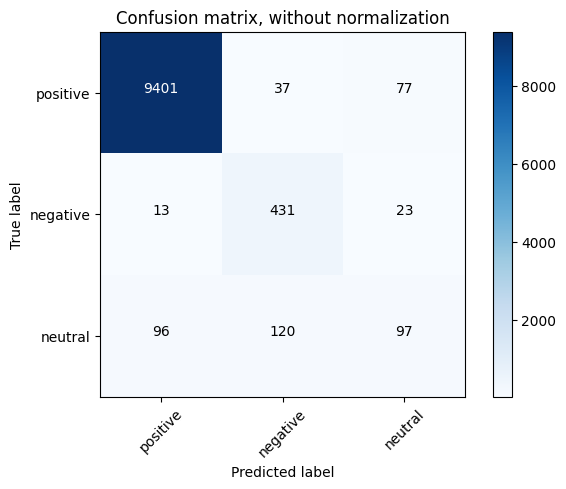

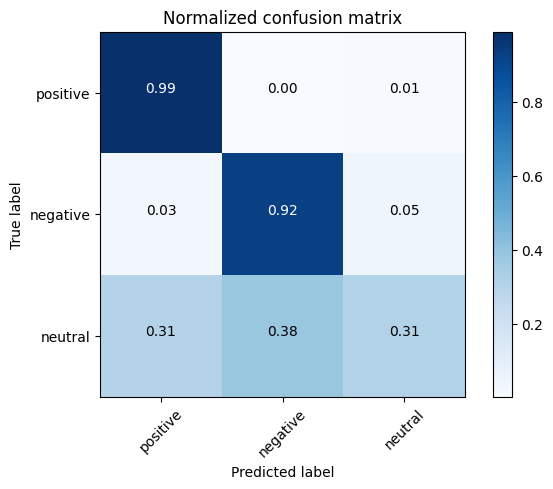

In [92]:
cnf_matrix = confusion_matrix(np.argmax(test_targets, axis=1).tolist(), np.argmax(test_preds, axis=1).tolist())
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

****DEMO****

In [118]:
example = input("Enter your review: ")
encodings = tokenizer.encode_plus(
  example,
  None,
  add_special_tokens=True,
  max_length=MAX_LEN,
  padding='max_length',
  return_token_type_ids=True,
  truncation=True,
  return_attention_mask=True,
  return_tensors='pt'
)
model.eval()
with torch.no_grad():
  input_ids = encodings['input_ids'].to(device, dtype=torch.long)
  attention_mask = encodings['attention_mask'].to(device, dtype=torch.long)
  token_type_ids = encodings['token_type_ids'].to(device, dtype=torch.long)
  output = model(input_ids, attention_mask, token_type_ids)
  final_output = torch.sigmoid(output).cpu().detach().numpy().tolist()
  print(test_df.columns[2:].to_list()[int(np.argmax(final_output, axis=1))])




Enter your review:  hotel rất đẹp


positive


/tmp/ipykernel_34/1463402013.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(test_df.columns[2:].to_list()[int(np.argmax(final_output, axis=1))])
